In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def list_files(ext=".csv"):
    files = os.listdir('.')
    print("Files in the current directory:")
    for file in files:
        if file.endswith(ext):
            print(file)

def load_dfs(files):
    dfs = {}
    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file, index_col=0)
            dfs["".join("".join(file.split("_")[-2:]).split(".")[0:-1])] = df

    dfs = pd.concat(dfs, axis=1, keys=dfs.keys())
    return dfs

dfs = load_dfs(os.listdir('.'))

In [2]:
dfs

muMLP10                                                    \
                 128       256       512      1024      2048      4096   
-12.000000  1.858027  1.795573  1.754231  1.716022  1.704689  1.695603   
-11.692308  1.827873  1.764151  1.722435  1.683312  1.670235  1.661184   
-11.384615  1.798149  1.732625  1.690285  1.650340  1.635353  1.626421   
-11.076923  1.768266  1.700536  1.657593  1.616803  1.599884  1.591048   
-10.769231  1.738079  1.668017  1.624210  1.582475  1.563653  1.554703   
-10.461538  1.707590  1.635050  1.589971  1.546917  1.526211  1.516910   
-10.153846  1.676612  1.601532  1.554632  1.509633  1.486929  1.477032   
-9.846154   1.645685  1.567616  1.517993  1.469990  1.445075  1.434237   
-9.538462   1.614801  1.532862  1.479291  1.427318  1.399674  1.387241   
-9.230769   1.583606  1.496819  1.437751  1.380636  1.349401  1.334592   
-8.923077   1.551929  1.458852  1.392361  1.328897  1.292716  1.274567   
-8.615385   1.519125  1.418310  1.342083  1.271266  1.228369  1.206093   
-8.307692   1.485303  1.374214  1.286698  1.206412  1.155292  1.127920   
-8.000000   1.449886  1.326605  1.225279  1.133478  1.071904  1.038369   
-7.692308   1.411979  1.274099  1.157737  1.050648  0.976772  0.935895   
-7.384615   1.370811  1.216627  1.082799  0.957478  0.869908  0.820846   
-7.076923   1.326828  1.152892  0.999386  0.854296  0.753552  0.697869   
-6.769231   1.279180  1.081790  0.905511  0.743332  0.634878  0.577039   
-6.461538   1.227222  1.004343  0.804552  0.630536  0.523711  0.468886   
-6.153846   1.172064  0.919805  0.696457  0.521147  0.424567  0.375278   
-5.846154   1.112455  0.831862  0.588599  0.420612  0.334523  0.294274   
-5.538462   1.053644  0.740326  0.484800  0.323992  0.249915  0.223929   
-5.230769   0.990875  0.653050  0.389293  0.241547  0.177768  0.162188   
-4.923077   0.935684  0.575620  0.305782  0.165278  0.117369  0.085763   
-4.615385   0.880203  0.515174  0.235646  0.108028  0.062837  0.052799   
-4.307692   0.839853  0.469302  0.190475  0.065883  0.035107  0.025121   
-4.000000   0.821275  0.453204  0.186986  0.048014  0.022101  0.016465   
-3.692308   0.803484  0.445236  0.185979  0.044162  0.014313  0.009670   
-3.384615   0.814678  0.465019  0.211593  0.071698  0.012502  0.008421   
-3.076923   0.836665  0.497841  0.251977  0.119948  0.028673  0.006546   
-2.769231   0.863265  0.541094  0.341975  0.184125  0.072112  0.015095   
-2.461538   0.900286  0.635306  0.405775  0.256764  0.153940  0.136243   
-2.153846   0.986056  0.718821  0.537816  0.394177  0.272705  0.185559   
-1.846154   1.068513  0.842404  0.692351  0.545129  0.453497  0.436111   
-1.538462   1.228725  1.053402  0.912078  0.753930  0.659261  0.622273   
-1.230769   1.440087  1.317499  1.180940  1.078138  0.956582  0.891766   
-0.923077   1.637947  1.509127  1.422730  1.325504  1.231180  1.108779   
-0.615385   1.856096  1.754832  1.669142  1.620343       NaN  1.521608   
-0.307692   1.999580  1.972891  1.916468       NaN       NaN       NaN   
 0.000000        NaN       NaN       NaN       NaN       NaN       NaN   

                      NTKMLP10                                          \
                8192       128       256       512      1024      2048   
-12.000000  1.691914  1.844064  1.711327  1.567660  1.328280  0.868916   
-11.692308  1.657666  1.828621  1.692987  1.538848  1.274379  0.775988   
-11.384615  1.622863  1.815196  1.675789  1.508851  1.216574  0.681622   
-11.076923  1.587284  1.801808  1.658032  1.478291  1.155058  0.588212   
-10.769231  1.550635  1.788157  1.638961  1.444673  1.086026  0.499298   
-10.461538  1.512436  1.774211  1.618441  1.407444  1.008030  0.408815   
-10.153846  1.471974  1.758684  1.595576  1.366074  0.922418  0.327469   
-9.846154   1.428375  1.740665  1.570603  1.320131  0.826122  0.255009   
-9.538462   1.380416  1.721273  1.542145  1.263325  0.722091  0.187855   
-9.230769   1.326613  1.702538  1.510887  1.202653  0.612124  0.140399   
-8.923077   1.26

In [3]:
filter_columns = [col for col in dfs.columns if "1" in col[0]]
filter_columns = [col for col in filter_columns if "mu" in col[0] or "NTK" in col[0]]
dfs = dfs[filter_columns]
dfs

muMLP10                                                    \
                 128       256       512      1024      2048      4096   
-12.000000  1.858027  1.795573  1.754231  1.716022  1.704689  1.695603   
-11.692308  1.827873  1.764151  1.722435  1.683312  1.670235  1.661184   
-11.384615  1.798149  1.732625  1.690285  1.650340  1.635353  1.626421   
-11.076923  1.768266  1.700536  1.657593  1.616803  1.599884  1.591048   
-10.769231  1.738079  1.668017  1.624210  1.582475  1.563653  1.554703   
-10.461538  1.707590  1.635050  1.589971  1.546917  1.526211  1.516910   
-10.153846  1.676612  1.601532  1.554632  1.509633  1.486929  1.477032   
-9.846154   1.645685  1.567616  1.517993  1.469990  1.445075  1.434237   
-9.538462   1.614801  1.532862  1.479291  1.427318  1.399674  1.387241   
-9.230769   1.583606  1.496819  1.437751  1.380636  1.349401  1.334592   
-8.923077   1.551929  1.458852  1.392361  1.328897  1.292716  1.274567   
-8.615385   1.519125  1.418310  1.342083  1.271266  1.228369  1.206093   
-8.307692   1.485303  1.374214  1.286698  1.206412  1.155292  1.127920   
-8.000000   1.449886  1.326605  1.225279  1.133478  1.071904  1.038369   
-7.692308   1.411979  1.274099  1.157737  1.050648  0.976772  0.935895   
-7.384615   1.370811  1.216627  1.082799  0.957478  0.869908  0.820846   
-7.076923   1.326828  1.152892  0.999386  0.854296  0.753552  0.697869   
-6.769231   1.279180  1.081790  0.905511  0.743332  0.634878  0.577039   
-6.461538   1.227222  1.004343  0.804552  0.630536  0.523711  0.468886   
-6.153846   1.172064  0.919805  0.696457  0.521147  0.424567  0.375278   
-5.846154   1.112455  0.831862  0.588599  0.420612  0.334523  0.294274   
-5.538462   1.053644  0.740326  0.484800  0.323992  0.249915  0.223929   
-5.230769   0.990875  0.653050  0.389293  0.241547  0.177768  0.162188   
-4.923077   0.935684  0.575620  0.305782  0.165278  0.117369  0.085763   
-4.615385   0.880203  0.515174  0.235646  0.108028  0.062837  0.052799   
-4.307692   0.839853  0.469302  0.190475  0.065883  0.035107  0.025121   
-4.000000   0.821275  0.453204  0.186986  0.048014  0.022101  0.016465   
-3.692308   0.803484  0.445236  0.185979  0.044162  0.014313  0.009670   
-3.384615   0.814678  0.465019  0.211593  0.071698  0.012502  0.008421   
-3.076923   0.836665  0.497841  0.251977  0.119948  0.028673  0.006546   
-2.769231   0.863265  0.541094  0.341975  0.184125  0.072112  0.015095   
-2.461538   0.900286  0.635306  0.405775  0.256764  0.153940  0.136243   
-2.153846   0.986056  0.718821  0.537816  0.394177  0.272705  0.185559   
-1.846154   1.068513  0.842404  0.692351  0.545129  0.453497  0.436111   
-1.538462   1.228725  1.053402  0.912078  0.753930  0.659261  0.622273   
-1.230769   1.440087  1.317499  1.180940  1.078138  0.956582  0.891766   
-0.923077   1.637947  1.509127  1.422730  1.325504  1.231180  1.108779   
-0.615385   1.856096  1.754832  1.669142  1.620343       NaN  1.521608   
-0.307692   1.999580  1.972891  1.916468       NaN       NaN       NaN   
 0.000000        NaN       NaN       NaN       NaN       NaN       NaN   

                      NTKMLP10                                          \
                8192       128       256       512      1024      2048   
-12.000000  1.691914  1.844064  1.711327  1.567660  1.328280  0.868916   
-11.692308  1.657666  1.828621  1.692987  1.538848  1.274379  0.775988   
-11.384615  1.622863  1.815196  1.675789  1.508851  1.216574  0.681622   
-11.076923  1.587284  1.801808  1.658032  1.478291  1.155058  0.588212   
-10.769231  1.550635  1.788157  1.638961  1.444673  1.086026  0.499298   
-10.461538  1.512436  1.774211  1.618441  1.407444  1.008030  0.408815   
-10.153846  1.471974  1.758684  1.595576  1.366074  0.922418  0.327469   
-9.846154   1.428375  1.740665  1.570603  1.320131  0.826122  0.255009   
-9.538462   1.380416  1.721273  1.542145  1.263325  0.722091  0.187855   
-9.230769   1.326613  1.702538  1.510887  1.202653  0.612124  0.140399   
-8.923077   1.26

/tmp/ipykernel_619410/179174497.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(keys))


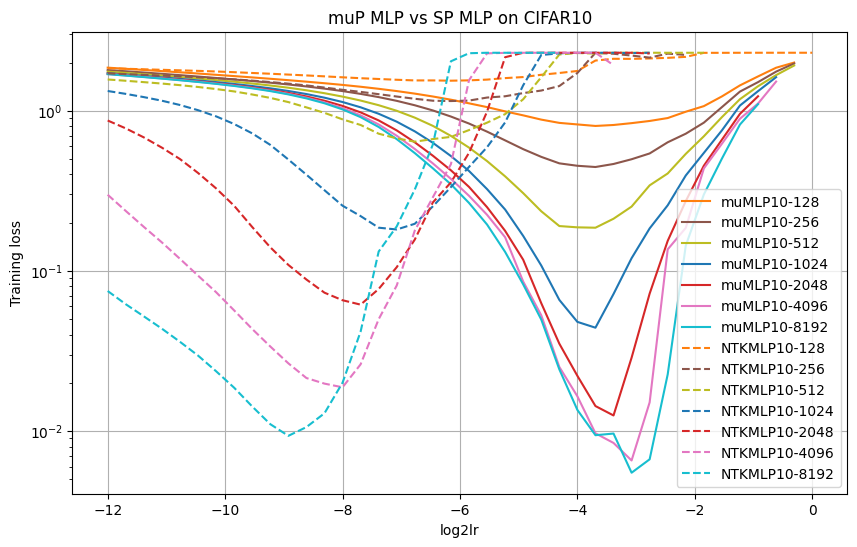

In [4]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(10, 6))

keys = sorted(set(col[1] for col in dfs.columns))
cmap = cm.get_cmap('tab10', len(keys))
color_map = {key: cmap(i) for i, key in enumerate(keys)}

for col in dfs.columns:
    size = ''.join(filter(str.isdigit, col[1]))
    key = col[1]
    color = color_map[key]
    linestyle = '-' if 'mu' in col[0] else '--'
    label = f"{col[0]}-{col[1]}"
    dfs[col].plot(ax=ax, label=label, linestyle=linestyle, color=color)

ax.legend()
# for col in dfs.columns:
#     min_idx = dfs[col].idxmin()
#     min_val = round(dfs[col].min(), 2)
#     if "mu" in col[0]:
#         # plt.annotate(f"{' '.join(col)}:{min_val}", xy=(min_idx, min_val), xytext=(min_idx+0.1, min_val + 0.1),
#         #             arrowprops=dict(facecolor='blue', shrink=0.01, width=1, headwidth=4, alpha=0.5))
#         plt.plot(min_idx, min_val, 'o', color='blue')
#     else:
#         # plt.annotate(f"{' '.join(col)}:{min_val}", xy=(min_idx, min_val), xytext=(min_idx+0.1, min_val + 0.1),
#         #             arrowprops=dict(facecolor='red', shrink=0.01, width=1, headwidth=4, alpha=0.5))
#         plt.plot(min_idx, min_val, 'o', color='red')

plt.title("muP MLP vs SP MLP on CIFAR10")
plt.xlabel("log2lr")
plt.ylabel("Training loss")
plt.grid()
ax.set_yscale('log')
plt.savefig("mlp_cifar10.png", dpi=300)
plt.show()

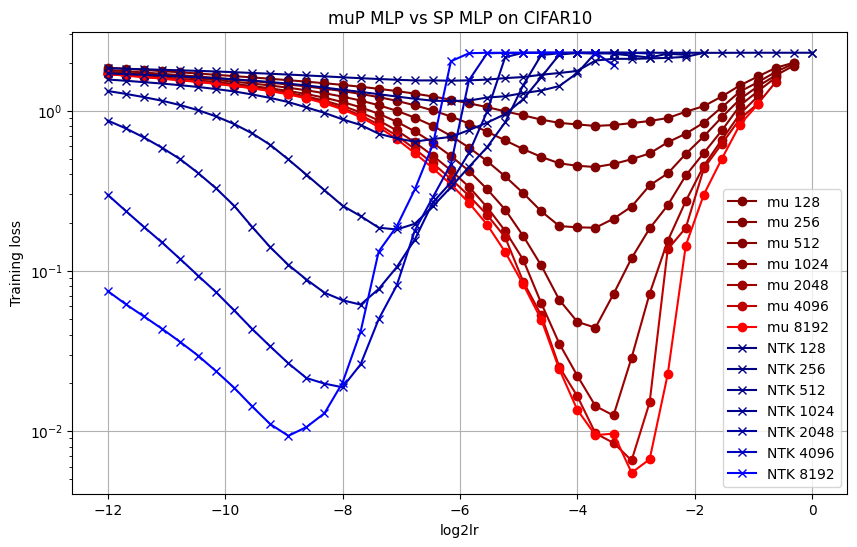

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(10, 6))

# Set explicit colors for top-level keys
color_map = {
    'muMLP10': (1.0, 0.0, 0.0),  # Red (RGB)
    'NTKMLP10':   (0.0, 0.0, 1.0),  # Blue (RGB)
}

# Extract and normalize sizes (widths) for brightness variation
sub_keys = sorted(set(col[1] for col in dfs.columns))
subkey_ints = {k: int(''.join(filter(str.isdigit, k))) for k in sub_keys}
norm = mcolors.Normalize(vmin=min(subkey_ints.values()), vmax=max(subkey_ints.values()))

for col in dfs.columns:
    model_type, size_str = col
    base_color = color_map[model_type]
    
    width = subkey_ints[size_str]
    hsv = mcolors.rgb_to_hsv(base_color)
    hsv[2] = norm(width) * 0.5 + 0.5  # brightness from [0.5, 1.0]
    color = mcolors.hsv_to_rgb(hsv)
    
    model_name = model_type.split("MLP")[0]
    label = f"{model_name} {size_str}"
    dfs[col].plot(ax=ax, label=label, color=color, linestyle='-', marker='o' if 'mu' in model_type else 'x')

ax.legend()
plt.title("muP MLP vs SP MLP on CIFAR10")
plt.xlabel("log2lr")
plt.ylabel("Training loss")
plt.grid()
ax.set_yscale('log')
plt.savefig("mlp_cifar10.png", dpi=300)
plt.show()
